<a href="https://colab.research.google.com/github/dkant000/ML_PROJECT/blob/master/C2077400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import OneHotEncoder
enco = OneHotEncoder()
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder() 
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.decomposition import pca
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

In [164]:
data = pd.read_csv('dataset.csv',index_col=None)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Discriptive Analysis

In [165]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


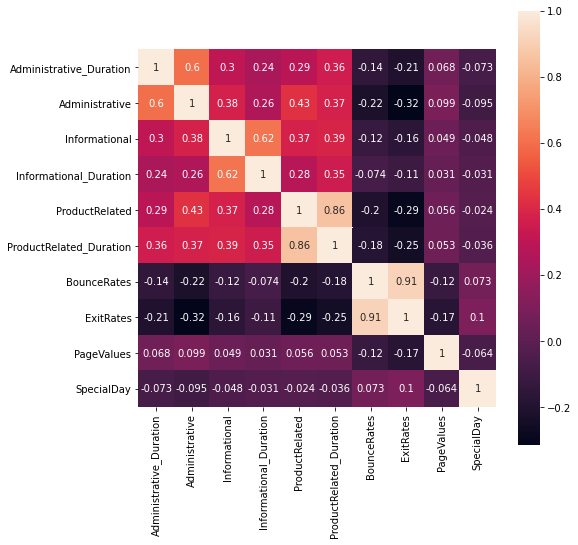

In [166]:
# coorellation between numerical features of dataset 

f,ax=plt.subplots(figsize=(8,8))
correlation=data[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']].corr()
sns.heatmap(correlation,annot=True,square=True)


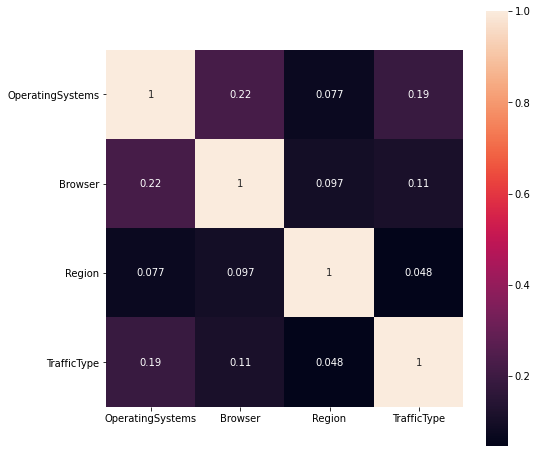

In [167]:
# # coorellation between categorical features of dataset 

f,ax=plt.subplots(figsize=(8,8))
correlation=data[['OperatingSystems','Browser','Region','TrafficType']].corr()
sns.heatmap(correlation,annot=True,square=True)


# Exploratory Data Analysis [EDA] 



> ***Univariate Data Analysis***



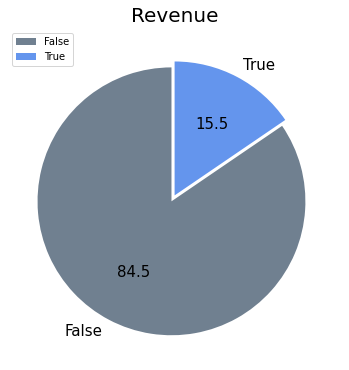

In [168]:
# Plotting a pie chart for Revenue
# Shows imbalanced data
plt.figure(figsize=(6,7))
data['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.05,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()

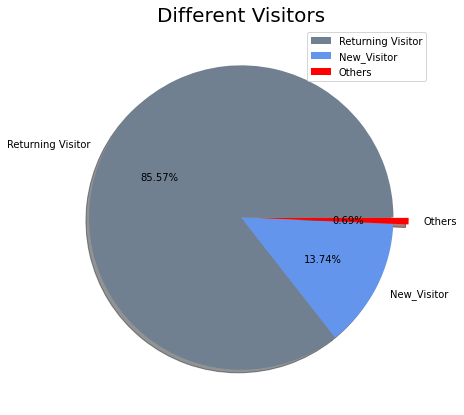

In [169]:
# plotting a pie chart for Visitors
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['slategray','cornflowerblue','red']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.axis('off')
plt.legend()

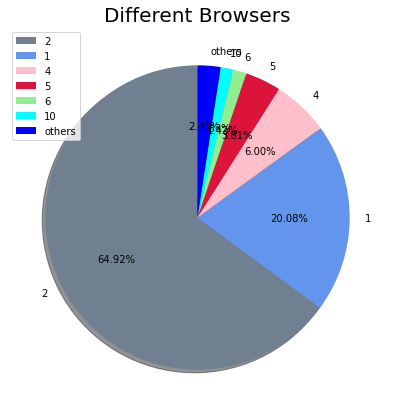

In [170]:
# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

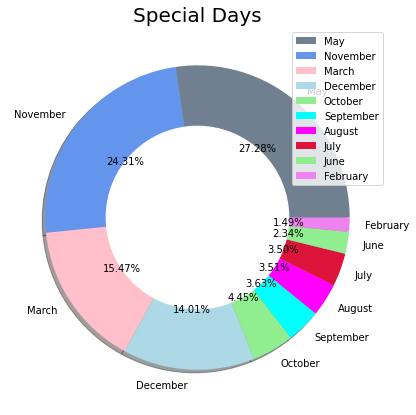

In [171]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['slategray', 'cornflowerblue', 'pink', 'lightblue', 'lightgreen', 'cyan', 'magenta', 'crimson', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

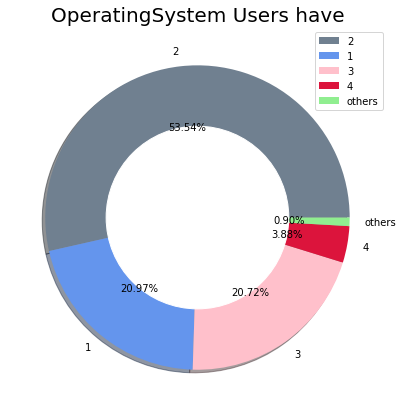

In [172]:
# plotting a pie chart for different number of OperatingSystems users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OperatingSystem Users have', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()



> ***Bivariate Data Analysis***



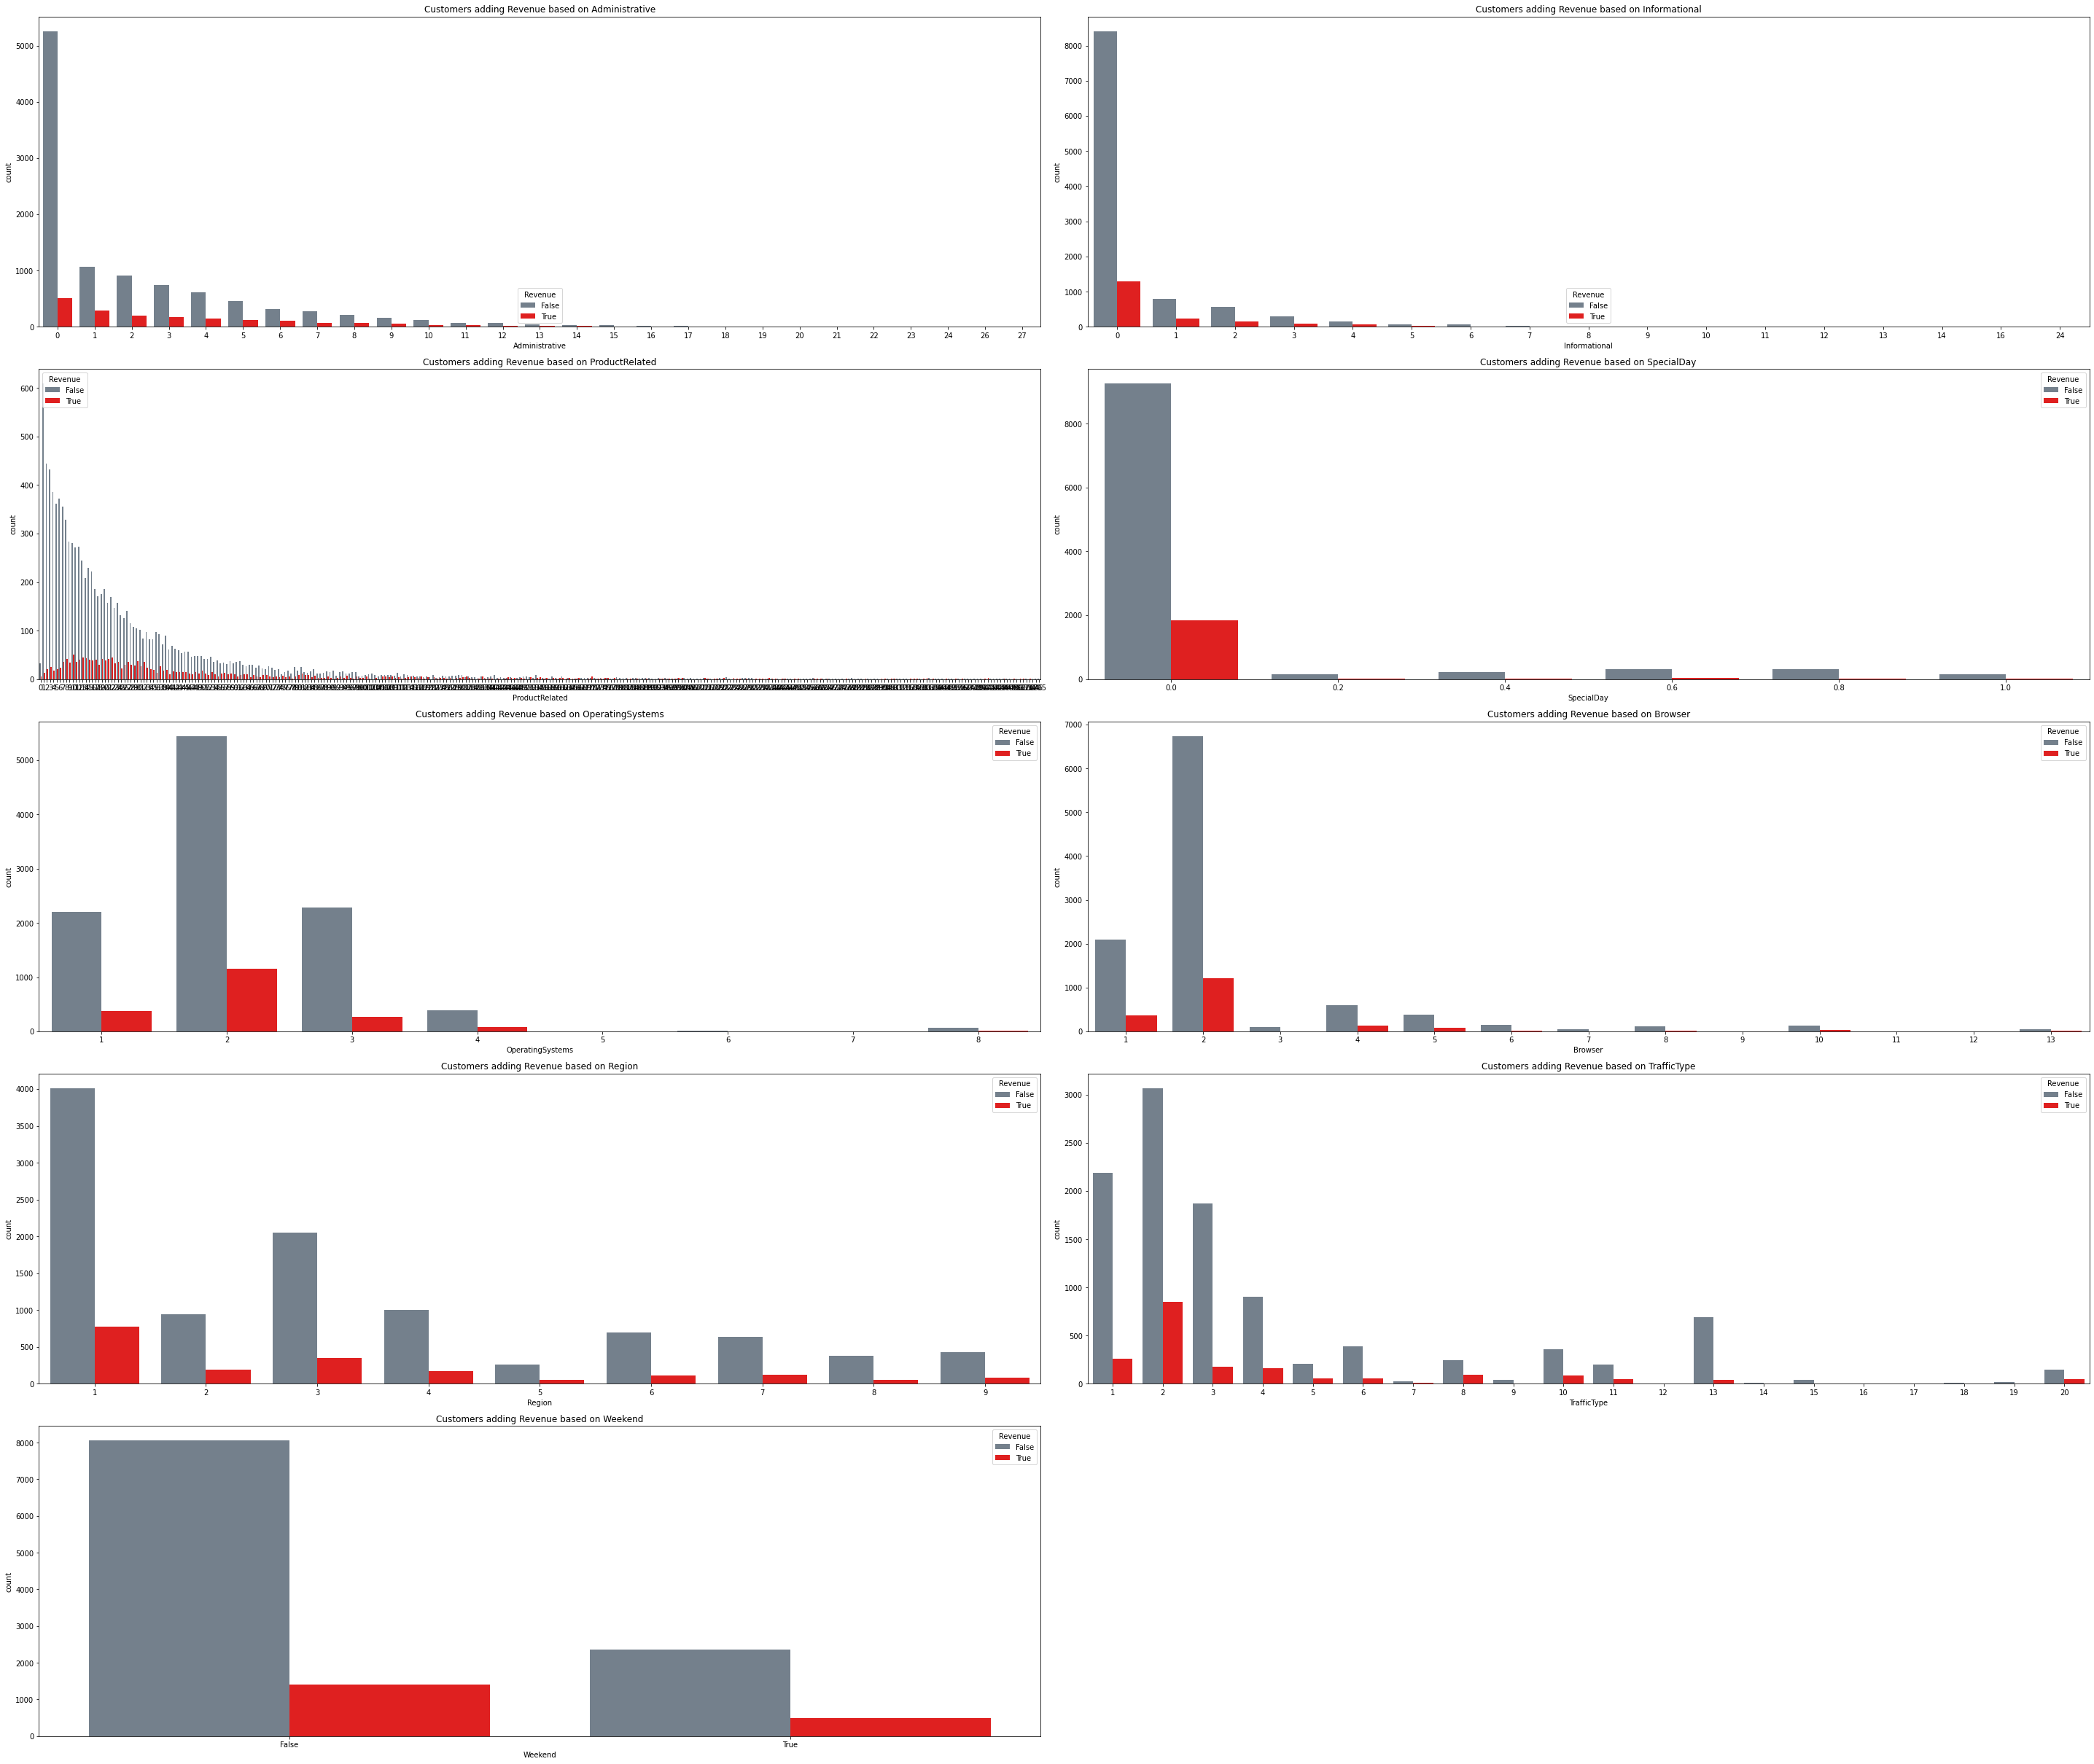

In [173]:
columns=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Weekend']    
plt.figure(figsize=(40,40))
plot_number = 0
for i in columns:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(data[i],hue=data['Revenue'], palette= ['slategray',"red"])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

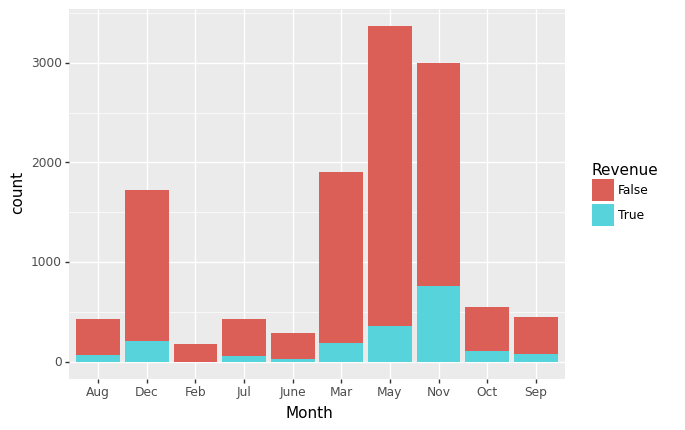

<ggplot: (-9223363291155445602)>

In [174]:
ggplot(data, aes(x='Month', fill = 'Revenue')) + \
    geom_bar(stat = 'count')

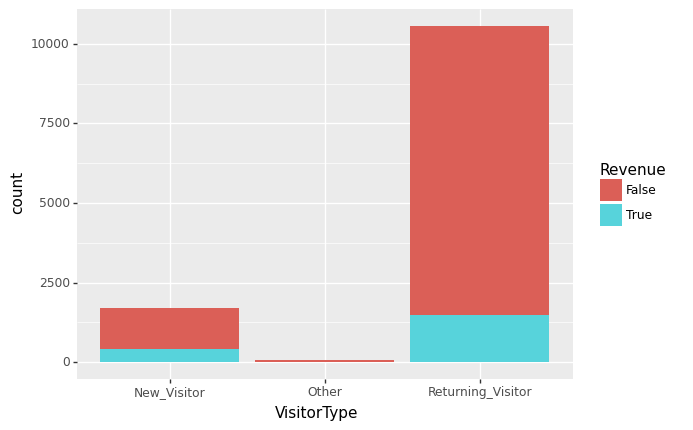

<ggplot: (8745699512426)>

In [175]:

ggplot(data, aes(x='VisitorType', fill = 'Revenue')) + \
    geom_bar(stat = 'count')

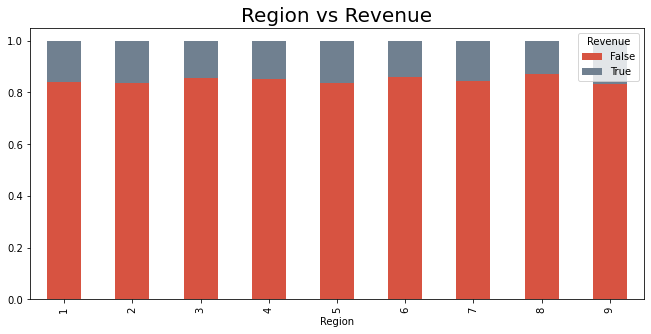

In [176]:
data = pd.crosstab(data['Region'], data['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (11, 5),color=['#D75341','slategray'])
plt.title('Region vs Revenue', fontsize = 20)
plt.show()